# I. - PREFACE

Nama: Muhammad Fariz Firdaus

Batch: SBY002

## 1. - Background

Hotel booking cancellations are a major problem for the hotel industry, as they might cause significant revenue losses to the owner. In 2022, 20% hotel bookings are being cancelled, which means that 1 out of 5 of the bookings are not realized ([source](https://revenue-hub.com/three-most-common-trends-impacting-cancellation-rates/)). Moreover, cancellations are often unpredictable and depend a lot factors, such as the deposit type, the customer profile, and the seasonality. Therefore, it is important for hotel managers to have a way of forecasting the demand and the cancellation probability for each booking, so that they can optimize their pricing, inventory, and operational strategies.

XYZ a tourism company that have been experiencing a lot of cancellation in some of their hotel. They need a classification machine learning model that can help them forecast whether or not a customer is going to cancel their booking.

## 2. - Objective 🏨

The objective of this project is to help XYZ company by building a supervised classification model that can predict whether a booking will be cancelled or not, based on the hotel [booking demand dataset](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand). The expected outcome of the project is a machine learning model that can help XYZ's hotel managers reduce the impact of cancellations and increase their revenue.

# II. - LIBRARIES

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

In [2]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Statistical analysis
import scipy.stats as st
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

In [4]:
# Machine learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
import optuna

In [5]:
# Preprocessing
from imblearn.over_sampling import SMOTENC, SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder

In [6]:
# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline

In [7]:
# Timing
import time

In [8]:
# Serialization
import pickle
import json

In [9]:
# disable warnings
import warnings
warnings.filterwarnings('ignore') #turn off warning

# III. - DATA LOADING

## 1. - Dataset Introduction

The dataset i'm using for this project is a dataset from a paper titled [Hotel Booking Demand Dataset](https://www.sciencedirect.com/science/article/pii/S2352340918315191), written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. Here are the explanations fo each columns:

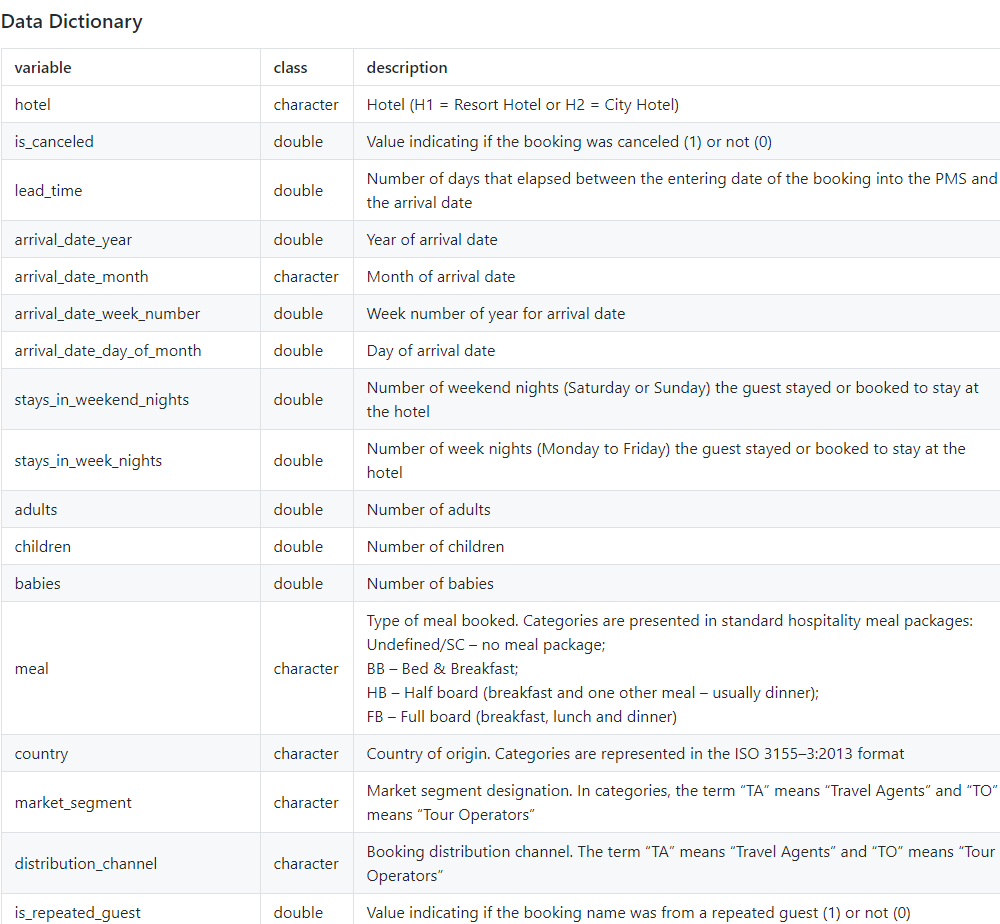

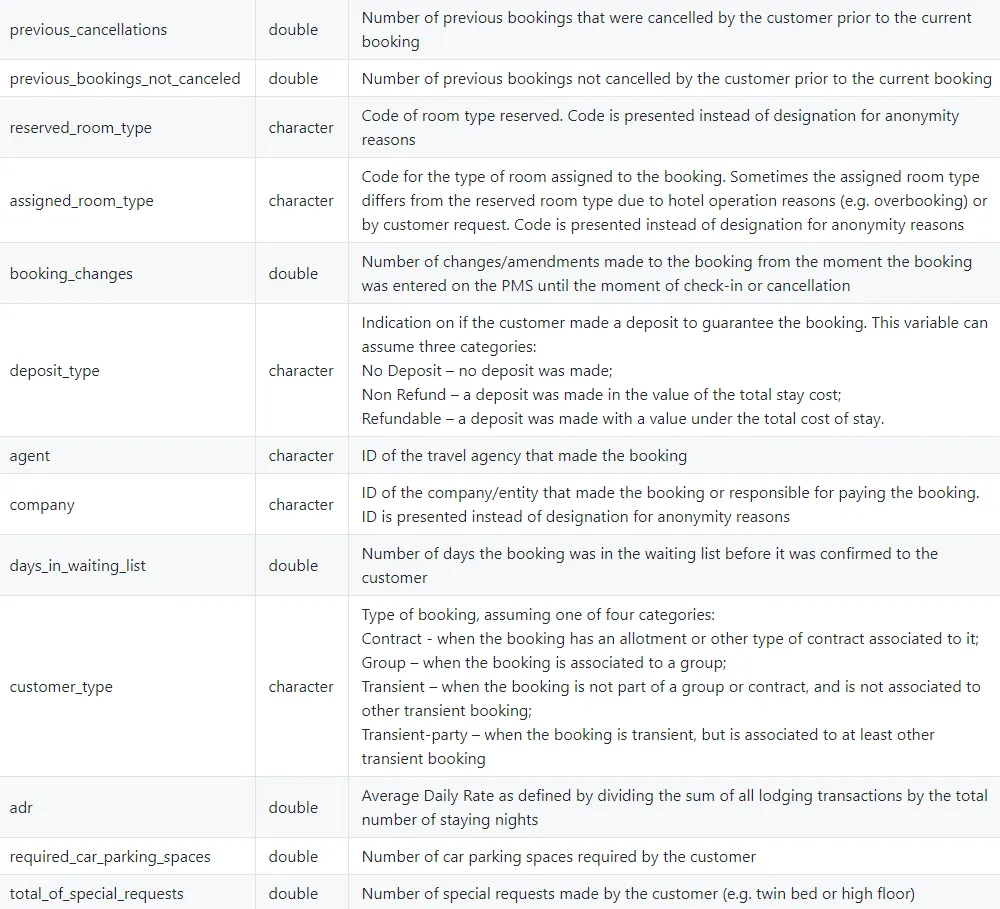

## 2. - Loading

In [10]:
data = pd.read_csv('deployment\\hotel_bookings.csv')

Save a copy as raw data backup

In [11]:
data_copy = data.copy()

In [12]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [13]:
data.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


The dataset have successfully loaded

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The imported dataframe is a 119390 rows of data with 32 columns, with missing values in some column.

## 3. - Cleaning

To improve the model's quality, I'm going to handle the duplicates

In [15]:
duplicate = data.duplicated().sum()
print('sum', duplicate)
print('percentage', (duplicate/len(data)) * 100)

sum 31994
percentage 26.797889270458164


Even though 26% is a lot, I need to drop these duplicated data to make sure the model readable for analysis, and good for prediction.

In [16]:
data = data.drop_duplicates()

In [17]:
data.shape

(87396, 32)

The row reduced to 87,396 rows.

For easier EDA later, I need to handle the missing values too.

In [18]:
for column in data.columns:
    percent_missing = data[column].isnull().mean() * 100
    if percent_missing > 0:
        print(column, percent_missing)

children 0.004576868506567806
country 0.5171861412421621
agent 13.951439425145315
company 93.98256213098998


Agent and company column represent the identification number of the travel agency or company that made the booking. However, many bookings are made directly by the customers, not by travel agencies, so this column is often empty. So, I will replace the missing values in agent column as 0, and I will remove company column directly as it contains 94% missing values, which won't gives any information.

In [19]:
data[['agent']] = data[['agent']].fillna(0)
data.drop(columns=['company'], inplace=True)

As for country columns, as it contains a little bit more than 0.5 %, which I personally think a lot, I need to replace them with the mode (Country that appear the most).

In [20]:
data['country'].fillna(data.country.mode().to_string(), inplace=True)

As for missing values in children column, as it has very low percentage, I will drop them directly.

In [21]:
data.dropna(subset=['children'], inplace=True)

In [22]:
for column in data.columns:
    percent_missing = data[column].isnull().mean() * 100
    if percent_missing > 0:
        print(column, percent_missing)

No more missing value left.

I noticed while exploring the dataset that some bookings have 0 guests. This mean the column children, adults, and babies are 0. This kind of data is ambigious and might be bad for analysis and prediction. So, I will remove them.

In [23]:
filter = (data.children == 0) & (data.adults == 0) & (data.babies == 0)
len(data[filter])/len(data) * 100

0.18994873672647383

there's 0.18% of them in the dataset, so it's safe to remove them.

In [24]:
no_guest = data[(data['children'] == 0) & (data['adults'] == 0) & (data['babies'] == 0)].index
data_clean = data.drop(no_guest)

# drop and reset index of the cleaned new dataset
data_clean.reset_index(drop=True, inplace=True)
data_clean.shape

(87226, 31)

Now I'm going to fix undefined columns in the dataset.

In [25]:
data_clean['distribution_channel'].value_counts()

TA/TO        69028
Direct       12954
Corporate     5062
GDS            181
Undefined        1
Name: distribution_channel, dtype: int64

There's only 1 undefined column, so i'd rather drop it.

In [26]:
data_clean = data_clean.drop(data_clean[(data_clean['distribution_channel'] == 'Undefined')].index)

In [27]:
data_clean['distribution_channel'].value_counts()

TA/TO        69028
Direct       12954
Corporate     5062
GDS            181
Name: distribution_channel, dtype: int64

I can now safe the cleaned dataset.

In [28]:
data_clean.to_csv('deployment\\hotel_bookings_clean.csv',index=False)

# IV. - EXPLORATORY DATA ANALYSIS (EDA)

Data exploration analysis in this project will be done by focusing on some columns.

## 1. - `country`🌏

Country column in the dataset explains the country of origin of each customer who made the booking.

### 1.1. - What are the most common countries of the bookings for each hotel type?

In [29]:
# Group the data by hotel type and count the frequency of each country
country_count = data_clean.groupby("hotel")["country"].value_counts()

# Sort the results in descending order
country_count = country_count.sort_values(ascending=False)

# Select the top countries for each hotel type
top_countries = country_count.groupby("hotel").head()

# Print the results
print(top_countries)

hotel         country
Resort Hotel  PRT        14230
City Hotel    PRT        13120
              FRA         7399
Resort Hotel  GBR         5904
City Hotel    GBR         4520
              DEU         4465
              ESP         3777
Resort Hotel  ESP         3467
              IRL         1948
              FRA         1424
Name: country, dtype: int64


For the city hotel, the top countries are Portugal (PRT), France (FRA), United Kingdom (GBR), Germany (DEU), and Spain (ESP).

For the resort hotel, the top countries are Portugal (PRT), United Kingdom (GBR), Spain (ESP), Ireland (IRL) and France (FRA).

For better analysis, I can visualize them using bar chart.

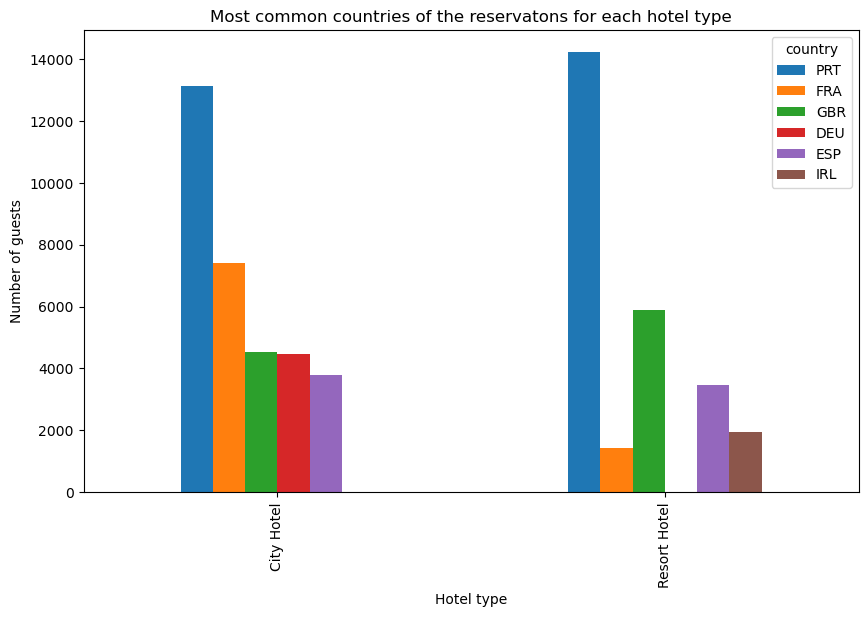

In [30]:
# Plot the bar chart
top_countries.unstack().plot(kind="bar", figsize=(10, 6))

# Add labels and title
plt.xlabel("Hotel type")
plt.ylabel("Number of guests")
plt.title("Most common countries of the reservatons for each hotel type")

# Show the plot
plt.show()

As can be seen in the visualization, both hotels are very popular in europian countries, especially Portugal.

Overall, XYZ should target more guests from these top countries. They also should try to explore market potential in countries nearby those top countries, as the citizens may have similar preferences or needs. They should also increase their customer loyalty by customizing their services based on those countries cultures, for example serving sourthern europian dishes, or offering promos on those countries national holidays.

## 2. - `arrival_date` 📅

the column `arrival_date_year` and `arrival_date_month` in the dataset explains the time the customers arrive.

### 2.1. - What are the peak and low seasons for each hotel type based on the arrival date?

to answer this EDA question, I will focus on the month.

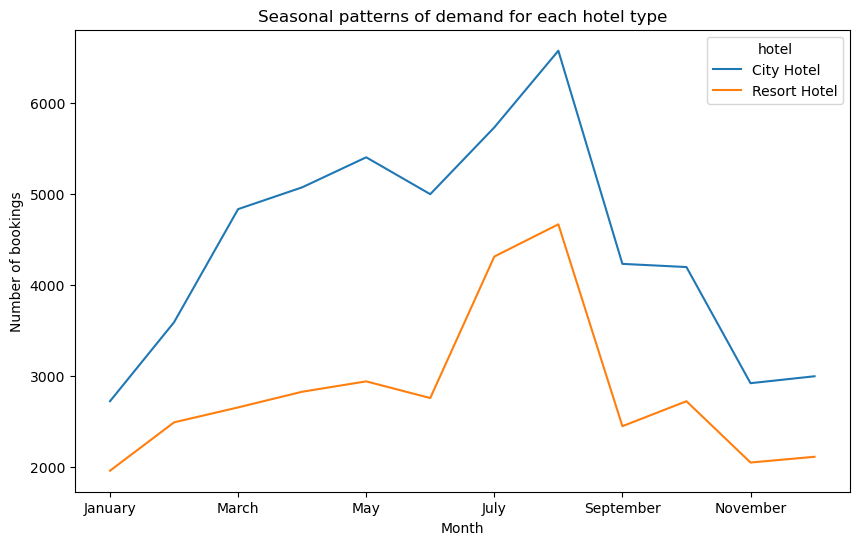

In [31]:
# Define the custom order of the months
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Convert the arrival_date_month column into a categorical variable with the custom order
data_clean["arrival_date_month"] = pd.Categorical(data_clean["arrival_date_month"], categories=month_order, ordered=True)

# Group the data by hotel type and arrival date month and count the number of bookings
month_count = data_clean.groupby(["hotel", "arrival_date_month"]).size()

# Plot the line chart
month_count.unstack(level=0).plot(kind="line", figsize=(10, 6))

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Number of bookings")
plt.title("Seasonal patterns of demand for each hotel type")

# Show the plot
plt.show()

Both hotel has similar seasonal pattern where the peak arrival of customers are in August, while the lowest arrival of custumers are in January.

To adress this, the company should prepare for their services in summer season, especially in August. This recommendation also supported by the fact that summer is holiday season in most europian countries, especially Portugal.

To prepare apropriately, the company should also acknowledge the fact that their hotels are not popular in winter, the lowes in January, and will gradually rises again at the end of winter (February).

### 2.2. - How do the seasons influence the cancellation rate?

First, I have to make season column.

In [32]:
# Create a season column using a lambda function
data_clean["season"] = data_clean["arrival_date_month"].apply(lambda x: "Winter" if x in ["January", "February", "December"]
                                                            else "Spring" if x in ["March", "April", "May"]
                                                            else "Summer" if x in ["June", "July", "August"]
                                                            else "Fall")
data_clean["season"].head()

0    Summer
1    Summer
2    Summer
3    Summer
4    Summer
Name: season, dtype: object

In [33]:
# Group the data by season and hotel type
season_group = data_clean.groupby(["season", "hotel"])

# Calculate the cancellation rate for each season and hotel type
cancellation_rate = season_group.apply(lambda x: x["is_canceled"].value_counts(normalize=True)[1] * 100)

print("Cancellation rate by season and hotel type:")
print(cancellation_rate)

Cancellation rate by season and hotel type:
season  hotel       
Fall    City Hotel      25.883182
        Resort Hotel    19.335640
Spring  City Hotel      31.730581
        Resort Hotel    21.599810
Summer  City Hotel      31.915140
        Resort Hotel    31.064156
Winter  City Hotel      29.152797
        Resort Hotel    16.917923
dtype: float64


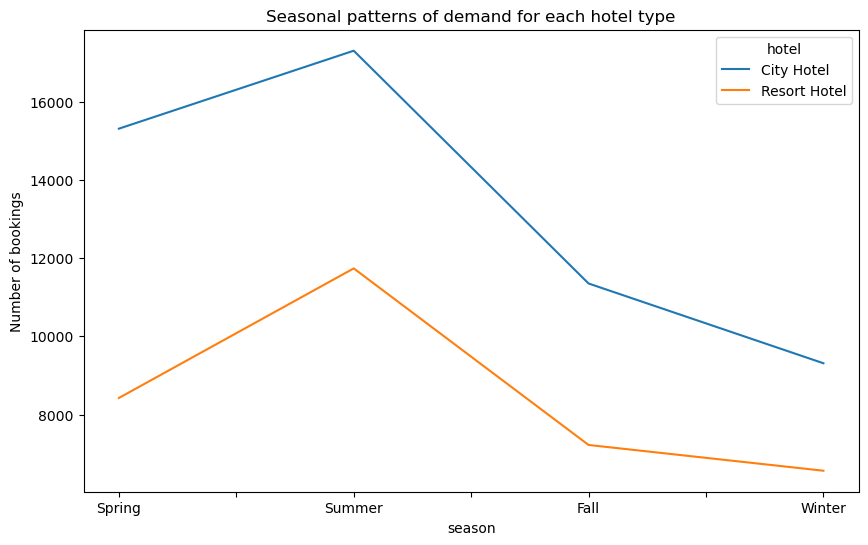

In [34]:
# Define the custom order of the seasons
season_order = ["Spring", "Summer", "Fall", "Winter"]

# Convert the arrival_date_season column into a categorical variable with the custom order
data_clean["season"] = pd.Categorical(data_clean["season"], categories=season_order, ordered=True)

# Group the data by hotel type and arrival date season and count the number of bookings
season_count = data_clean.groupby(["hotel", "season"]).size()

# Plot the line chart
season_count.unstack(level=0).plot(kind="line", figsize=(10, 6))

# Add labels and title
plt.xlabel("season")
plt.ylabel("Number of bookings")
plt.title("Seasonal patterns of demand for each hotel type")

# Show the plot
plt.show()

In both hotel, the cancellation is highest in Summer, this makes sense as the reservations are also peaked at Summer.

To address this, the company may have to implement some policies or incentives to discourage cancellations, especially in the Summer seasons, when the demand is high. For example, the company can charge a cancellation fee.

## 3. - Average Daily Rate (`adr`) 💰

The `adr` is the amount of money that a guest pays per night at a hotel.

### 3.1. - Is there a significant difference in the average daily rate (`adr`) between the city hotel and the resort hotel?

$H0$: there is no difference in the ADR between the city hotel and resort hotel.

$H1$: there is a difference in the ADR between the city hotel and resort hotel.

In [35]:
# Filter the data_clean by hotel type and cancellation status
city = data_clean[(data_clean["hotel"] == "City Hotel") & (data_clean["is_canceled"] == 0)]["adr"]
resort = data_clean[(data_clean["hotel"] == "Resort Hotel") & (data_clean["is_canceled"] == 0)]["adr"]

In [36]:
# Perform the t-test
t_stat, p_value = st.ttest_ind(city, resort, equal_var=True)

# Calculate the mean value of each hotel type
city_mean = city.mean()
resort_mean = resort.mean()

# Print the results
print("City hotel mean ADR:", city_mean)
print("Resort hotel mean ADR:", resort_mean)
print(t_stat, p_value)

City hotel mean ADR: 108.64228872955773
Resort hotel mean ADR: 93.00031523036063
38.195560657928496 0.0


In [37]:
# Menentukan tingkat signifikansi (alpha)
alpha = 0.05

# Menguji hipotesis
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

Reject H0


The H0 is sucessfully rejected, so there is a significance difference between them. The tstat is very large, which means that the `adr` of the city hotel and the resort hotel are very different, with city hotel having higher `idr` generated. XYZ should focus on their city hotel, since it generates more money for them.

## 4. - `is_canceled` ❌

`is_canceled` column explains wheter or not a booking was cancelled by customers.

### 4.1. - What are the features that minght affect whether or not a bookings is canceled?

In this project, I'm going to predict the `is_canceled` column. So, in order to do easier feature engineering later, I need to gain insights about how are the relationships between `is_canceled` compared to all the other columns.

In [38]:
data_clean.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'season'],
      dtype='object')

In [39]:
col_cat=['hotel', 'arrival_date_month', 'arrival_date_day_of_month',
        'meal', 'country', 'market_segment', 'distribution_channel',
        'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
        'deposit_type', 'agent', 'customer_type', 'reservation_status',
        'reservation_status_date'
        ]
col_num=['lead_time','arrival_date_year', 'arrival_date_week_number',
        'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
        'children', 'babies', 'previous_cancellations',
        'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
        'adr', 'required_car_parking_spaces', 'total_of_special_requests',
        ]

Because the target output (`is_canceled`) is in the form of categorical data, then to calculate the correlation statistics, I will use `kendall` method for numerical columns, and `chi-squared` method for categorical columns. For easier calculations, I will create a function first.

In [40]:
def calculate_corr_with_is_canceled(data, column_names, column_type):
    """
    This function calculates how each column is related to the 'is_canceled' column in the DataFrame.
    It uses different methods for different types of columns (kendall or chi-square).
    It prints the results for each column.
    """

    # Calculate and print the results for each column
    for i in range(len(column_names)):
        column_name = column_names[i]

        if column_type == 'num':
            # Use kendall method for numerical columns
            method = 'Kendall'
            result, p_value = st.kendalltau(data[column_name], data['is_canceled'])

        elif column_type == 'cat':
            # Use chisquare method for categorical columns
            method = 'Chisquare'

            # Make a table that shows the frequency of each combination of values
            table = pd.crosstab(data[column_name], data['is_canceled'])

            # Do the chisquare test on the table
            chi2, p_value, dof, expected = st.chi2_contingency(table)

            # Calculate the result as the square root of chi2 divided by the number of rows
            result = np.sqrt(chi2 / data.shape[0])

        print(f"{method} correlation result for '{column_name}' and 'is_canceled':")
        print(f"Result: {result}")
        print(f"P-value: {p_value}")
        print("\n")


first for categorical columns.

In [41]:
calculate_corr_with_is_canceled(data, col_cat, 'cat')

Chisquare correlation result for 'hotel' and 'is_canceled':
Result: 0.07151593522638335
P-value: 3.2943359239611633e-99


Chisquare correlation result for 'arrival_date_month' and 'is_canceled':
Result: 0.08555774850821123
P-value: 4.426123365183816e-130


Chisquare correlation result for 'arrival_date_day_of_month' and 'is_canceled':
Result: 0.028144153086949647
P-value: 6.165101422729916e-05


Chisquare correlation result for 'meal' and 'is_canceled':
Result: 0.06337419694374863
P-value: 1.0712611953280725e-74


Chisquare correlation result for 'country' and 'is_canceled':
Result: 0.1970159619432512
P-value: 0.0


Chisquare correlation result for 'market_segment' and 'is_canceled':
Result: 0.2208905427299161
P-value: 0.0


Chisquare correlation result for 'distribution_channel' and 'is_canceled':
Result: 0.15221560632560555
P-value: 0.0


Chisquare correlation result for 'is_repeated_guest' and 'is_canceled':
Result: 0.08956722485560022
P-value: 1.737924593423608e-154


Chisquare cor

now numerical columns.

In [42]:
calculate_corr_with_is_canceled(data, col_num, 'num')

Kendall correlation result for 'lead_time' and 'is_canceled':
Result: 0.18591965287758092
P-value: 0.0


Kendall correlation result for 'arrival_date_year' and 'is_canceled':
Result: 0.08349862567705049
P-value: 2.775693319516575e-147


Kendall correlation result for 'arrival_date_week_number' and 'is_canceled':
Result: 0.00038528416665125254
P-value: 0.890154675322939


Kendall correlation result for 'stays_in_weekend_nights' and 'is_canceled':
Result: 0.055894898488545286
P-value: 6.11267163926245e-70


Kendall correlation result for 'stays_in_week_nights' and 'is_canceled':
Result: 0.08457639018872742
P-value: 1.1340737642740929e-175


Kendall correlation result for 'adults' and 'is_canceled':
Result: 0.08815675850984267
P-value: 1.2431709678745455e-157


Kendall correlation result for 'children' and 'is_canceled':
Result: 0.06067407931416561
P-value: 1.2505849424768078e-73


Kendall correlation result for 'babies' and 'is_canceled':
Result: -0.021221303548262363
P-value: 3.39563544

I'm going to filter them based on their p-value. columns with p-value lower than 0.05 means their correlation with diabetic are by chance.

Here is a list of significant columns based on the Kendall and chi square correlation results:

In [43]:
col_to_keep = ['arrival_date_month',
    'country',
    'market_segment',
    'distribution_channel',
    'is_repeated_guest',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'customer_type',
    'reservation_status',
    'reservation_status_date',
    'lead_time',
    'arrival_date_year',
    'stays_in_week_nights',
    'adults',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests'
    ]

# V. - FEATURE ENGINEERING

## 1. - Split Features(X) dan target (y)

In [44]:
# separate X and y by focusing on default_payment_next_month column
X = data_clean.drop('is_canceled', axis=1)
y = data_clean['is_canceled']

In [45]:
# Print the new shape
print('Feature (X) :', X.shape)
print('Target (y) :', y.shape)

Feature (X) : (87225, 31)
Target (y) : (87225,)


X is a datafreame with 87226 rows and 31 columns.

Because the model that I'm going to make is a classification model, I will also calculate the ratio for each prediction class, to check for data imbalance.

In [46]:
y.value_counts()

0    63220
1    24005
Name: is_canceled, dtype: int64

class 0 = 72.5%, class 1 = 27.5%

This means the dataset is mildly imbalanced, where 27.5% reservations are canceled, while the rest are not.

## 3. - Split Train set and Test set

In [47]:
# split data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify=y, random_state=2)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)
print('Train Size :', y_train.shape)
print('Test Size :', y_test.shape) 

Train Size : (58440, 31)
Test Size : (28785, 31)
Train Size : (58440,)
Test Size : (28785,)


With the ratio of 7:3, the train and test sets are created for model training and evaluation purposes.

To make sure the ratio of each class is still the same after being split, I have to check it once again.

In [48]:
y_train.value_counts()

0    42357
1    16083
Name: is_canceled, dtype: int64

The train set still has the same ratio as the dataset of 27.5% cancelled bookings and 72.5% are not.

In [49]:
y_test.value_counts()

0    20863
1     7922
Name: is_canceled, dtype: int64

The test set also still has the same ratio as the dataset of 27.5% cancelled bookings and 72.5% are not.

## 4. - Feature Selection

Based on the correlation results I calculated in EDA, here is a list of columns I`m keeping for building the model:

- `arrival_date_month`
- `country`
- `market_segment`
- `distribution_channel`
- `is_repeated_guest`
- `assigned_room_type`
- `deposit_type`
- `agent`
- `customer_type`
- `reservation_status`
- `reservation_status_date`
- `lead_time`
- `arrival_date_year`
- `stays_in_week_nights`
- `adults`
- `previous_cancellations`
- `previous_bookings_not_canceled`
- `booking_changes`
- `adr`
- `required_car_parking_spaces`
- `total_of_special_requests`

These columns showed statistical significance in relation to the `is_canceled` column and are potential candidates for inclusion in booking cancelation prediction model. 

In [50]:
# redefine X_train based on column to keep
X_train = X_train[col_to_keep]
X_test = X_test[col_to_keep]

In [51]:
X_train['arrival_date_year'].unique()

array([2017, 2016, 2015], dtype=int64)

In [52]:
for x in ['country', 'agent', 'reservation_status_date']:
    print(x, len(X_train[x].unique()))

country 162
agent 303
reservation_status_date 910


I beleive `arrival_date_year` won't give much information to the model, so I will not include it.

I also beleive that the column `country`, `agent`,  and `reservation_status_date` are having too much cardinality, since they represents the ID of country, ID of agent, and the date the booking was made respectively.

In [53]:
X_train.drop(columns=['arrival_date_year', 'country', 'agent', 'reservation_status_date'], inplace=True)
X_test.drop(columns=['arrival_date_year', 'country', 'agent', 'reservation_status_date'], inplace=True)

In [54]:
# Print the new shape
print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)

Train Size : (58440, 17)
Test Size : (28785, 17)


Now only 17 columns remaining that act as the features (X).

## 5. - Split numerical column and categorical column

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58440 entries, 10501 to 51651
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   arrival_date_month              58440 non-null  category
 1   market_segment                  58440 non-null  object  
 2   distribution_channel            58440 non-null  object  
 3   is_repeated_guest               58440 non-null  int64   
 4   assigned_room_type              58440 non-null  object  
 5   deposit_type                    58440 non-null  object  
 6   customer_type                   58440 non-null  object  
 7   reservation_status              58440 non-null  object  
 8   lead_time                       58440 non-null  int64   
 9   stays_in_week_nights            58440 non-null  int64   
 10  adults                          58440 non-null  int64   
 11  previous_cancellations          58440 non-null  int64   
 12  previous_booki

Some column are having category or object dataset, while the rest are numericals. But, I can't split them just from that, I will also use personal judgement. I will also split the numerical column even further into discrete and continue.

In [56]:
cat_col = ['arrival_date_month', 'market_segment', 'distribution_channel',
        'is_repeated_guest', 'assigned_room_type', 'deposit_type',
        'customer_type', 'reservation_status']
num_col = ['lead_time', 'adr', 'stays_in_week_nights', 'adults', 'previous_cancellations',
            'previous_bookings_not_canceled', 'booking_changes',
            'required_car_parking_spaces', 'total_of_special_requests']
num_col_c = ['lead_time', 'adr']
num_col_d = ['stays_in_week_nights', 'adults', 'previous_cancellations',
            'previous_bookings_not_canceled', 'booking_changes',
            'required_car_parking_spaces', 'total_of_special_requests']

In [57]:
# split based on data type
X_train_cat = X_train[cat_col]
X_train_num_c = X_train[num_col_c]
X_train_num_d = X_train[num_col_d]

## 6. - Handling Outlier

I only handle the continuous data. Based on my personal research, outliers in discrete data don't need to be handled.

Before detecting the outliers, we need to know the skewness of the numerical columns to decide the method

In [58]:
# Loop through each feature
for feature in X_train_num_c.columns:
    # Calculate the skewness of the feature
    skewness = st.skew(X_train[feature])
    # Print the skewness of the feature
    print(f'Skewness for {feature}: {skewness}')

Skewness for lead_time: 1.4306968932018362
Skewness for adr: 14.840373036517056


The treshold for normal distribution data is 0.5 skewness. Because all of them have more than 0.5 skewness, they're all can be considered skewed data.

In [59]:
def calculate_iqr(data_frame, column_name):
    """
    Calculate the Interquartile Range (IQR) for a specific column in a DataFrame.
    """

    # Calculate quartiles
    Q1 = data_frame[column_name].quantile(0.25)
    Q3 = data_frame[column_name].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

In [60]:
def outliers_percentage(data_frame, column_name):
    """
    Identify outliers in a specified column of a DataFrame, calculate the percentage,
    and print the result along with upper and lower boundaries.
    """
    # Calculate IQR
    lower_bound, upper_bound = calculate_iqr(data_frame, column_name)

    # Identify outliers
    outliers = data_frame[(data_frame[column_name] < lower_bound) | (data_frame[column_name] > upper_bound)]

    # Calculate percentage of outliers
    percentage_outliers = (len(outliers) / len(data_frame)) * 100

    # Print the result
    print(f'Column: {column_name}')
    print(f'Lower Boundary: {lower_bound:.2f}')
    print(f'Upper Boundary: {upper_bound:.2f}')
    print(f'Percentage of outliers: {percentage_outliers:.2f}%')

In [61]:
# Loop through each feature
for feature in num_col_c:
    # Call the function
    outliers_percentage(X_train_num_c, feature)

Column: lead_time
Lower Boundary: -158.50
Upper Boundary: 293.50
Percentage of outliers: 2.84%
Column: adr
Lower Boundary: -20.98
Upper Boundary: 227.14
Percentage of outliers: 2.86%


My treshold for dropping outlier is 10%, so I consider 2.8% very low, hence I will drop both of them.

In [62]:
# Loop through each feature in num_col_c
for feature in num_col_c:
    # Calculate IQR
    lower_bound, upper_bound = calculate_iqr(X_train_num_c, feature)

    # Drop outliers based on IQR
    X_train_num_c = X_train_num_c[(X_train_num_c[feature] >= lower_bound) & (X_train_num_c[feature] <= upper_bound)]

# Uniform them
X_train_cat = X_train_cat.loc[X_train_num_c.index]
X_train_num_d = X_train_num_d.loc[X_train_num_c.index]

In [63]:
# print new shape
print('Continous', X_train_num_c.shape)
print('Discrete', X_train_num_d.shape)

Continous (55203, 2)
Discrete (55203, 7)


### 6.3. - Concat Train Data

To avoid confusions in later steps, I will concat them back again.

In [64]:
X_train_handled = pd.concat([X_train_num_c, X_train_num_d, X_train_cat],axis=1)

In [65]:
X_train_handled.shape

(55203, 17)

In [66]:
# Modify the target too
y_train_final = y_train.loc[X_train_handled.index]
y_train_final.shape

(55203,)

## 8. - Feature Scaling and Encoding

### 8.1. - Split Skewed and Normal Numerical Columns

I will use minmax scaler for skewed data, and standard scaler for normally distributed data. Which is why I will check their skewness after the outlier was handled.

In [67]:
# Loop through each feature
for feature in X_train_handled[num_col].columns:
    # Calculate the skewness of the feature
    skewness = st.skew(X_train_handled[feature])
    # Print the skewness of the feature
    print(f'Skewness for {feature}: {skewness}')

Skewness for lead_time: 1.0344752702884745
Skewness for adr: 0.35013976163673416
Skewness for stays_in_week_nights: 2.5260154451258616
Skewness for adults: -0.33285483852996056
Skewness for previous_cancellations: 33.46469870108086
Skewness for previous_bookings_not_canceled: 19.164642792209854
Skewness for booking_changes: 4.731244558454696
Skewness for required_car_parking_spaces: 3.7533533217378885
Skewness for total_of_special_requests: 1.0807942536422086


The treshold for normal distribution data is 0.5 skewness. I will separate them based on that.

In [68]:
num_col_s = [
    'lead_time',
    'stays_in_week_nights',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'required_car_parking_spaces',
    'total_of_special_requests'
]
num_col_n = [
    'adr', 'adults'
]

### 8.2. - Split Data into Nominal and Ordinal Columns

as for feature encoding, I'm going to use onehotencoder for nominal columns, and ordinal encoding for categorical columns. I'm splitting them based on personal judgement.

In [69]:
cat_col_n = ['market_segment', 'distribution_channel',
        'is_repeated_guest', 'deposit_type',
        'customer_type', 'reservation_status']
cat_col_o = ['arrival_date_month', 'assigned_room_type']
categories = [
        ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
        ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
]

### 8.3. - Define the Steps

In [70]:
# Create a column transformer for scaler
scaling_encoding_step = ColumnTransformer(transformers=[
    ("normal_scaler", StandardScaler(), num_col_n),
    ("skewed_scaler", MinMaxScaler(), num_col_s),
    ("ordinal", OrdinalEncoder(), cat_col_n),
    ("categorical", OneHotEncoder(categories=categories), cat_col_o)
])

## 9. - Oversampling

In [71]:
y_train_final.value_counts()

0    40488
1    14715
Name: is_canceled, dtype: int64

the dataset is moderately imbalanced with 72.5% bookings not canceled and 27.5% bookings cancelled.

To create a great classification model, the model needs to be trained using a balanced data. An imbalance dataset might cause the model to have a bias towards one of the class. One of the method that can be done to solve this is to do oversampling. Oversampling is a balancing method that increase the lower numbered class to match the higer numbered one. SMOTE-NC is a popular oversampling method that works by focusing on the minority class, by selecting a random data from the minority class then selecting a number of random neighbor using the Euclidean distance between them. SMOTE-NC is better than SMOTE for this project, as it can process categorical data too.

In [72]:
X_train_handled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55203 entries, 10501 to 51651
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   lead_time                       55203 non-null  int64   
 1   adr                             55203 non-null  float64 
 2   stays_in_week_nights            55203 non-null  int64   
 3   adults                          55203 non-null  int64   
 4   previous_cancellations          55203 non-null  int64   
 5   previous_bookings_not_canceled  55203 non-null  int64   
 6   booking_changes                 55203 non-null  int64   
 7   required_car_parking_spaces     55203 non-null  int64   
 8   total_of_special_requests       55203 non-null  int64   
 9   arrival_date_month              55203 non-null  category
 10  market_segment                  55203 non-null  object  
 11  distribution_channel            55203 non-null  object  
 12  is_repeated_gu

To avoid error later on, I have to convert categorical column into object.

In [73]:
X_train_handled['arrival_date_month']=X_train_handled['arrival_date_month'].astype("object")

In [74]:
oversampling_step = SMOTENC([9, 10, 11, 12, 13, 14, 15, 16], k_neighbors=10, random_state=10, n_jobs=-1)
X_train_balanced, y_train_balanced = oversampling_step.fit_resample(X_train_handled, y_train_final)
y_train_balanced.value_counts()

1    40488
0    40488
Name: is_canceled, dtype: int64

The dataset is now balanced.

# VI. - MODEL DEFINITION

For this project, I will use multiple machine learning algorithm to see which algorithm fits the case perfectly. The algorithm I'm going to use are:
1. K-Nearest Neighbour
2. Support Vector Machine
3. Decision Tree
4. Random Forest
5. GradientBoosting Classifier

## 1. - K-Nearest Neighbour (KNN)

In [75]:
knn_step = KNeighborsClassifier()

## 2. - Support Vector Machine (SVM) using Bagging Clasifier

In this project, I'm using svc in a bagging classifier wrapper, rather than dierctly using svc. How this ensemble model works is by running many small SVC, insead of just one big SVC. Each SVC will make predictions on each subset of data, then the bagging classifier will implement bagging method, which is combining all results to gives final answer.

In [76]:
svm_step = BaggingClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'), max_samples=0.1, n_estimators=5, random_state=2, n_jobs=-1)

## 3. - Decision Tree

In [77]:
tree_step = DecisionTreeClassifier()

## 4. - Random Forest

In [78]:
forest_step = RandomForestClassifier(random_state=2, n_jobs=-1)

## 5. - GradientBoosting Classifier

In [79]:
GradientBoosting_step = GradientBoostingClassifier()

# VII. MODEL TRAINING

For model training, I will define and fit a pipeline for each model.

## 1. - K-Nearest Neighbour (K-NN)

In [80]:
# Create a pipeline for KNN model
pipeline_knn = Pipeline(steps=[
    ("scaling and encoding", scaling_encoding_step),
    ("model", knn_step)
])

In [81]:
# Fit the pipeline on the data
pipeline_knn.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('scaling and encoding',
                 ColumnTransformer(transformers=[('normal_scaler',
                                                  StandardScaler(),
                                                  ['adr', 'adults']),
                                                 ('skewed_scaler',
                                                  MinMaxScaler(),
                                                  ['lead_time',
                                                   'stays_in_week_nights',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('ordinal', OrdinalEncode...
                                                   'is_repeated_guest',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status']),
                                                 ('categorical',
                                                  OneHotEncoder(categories=[['January',
                                                                             'February',
                                                                             'March',
                                                                             'April',
                                                                             'May',
                                                                             'June',
                                                                             'July',
                                                                             'August',
                                                                             'September',
                                                                             'October',
                                                                             'November',
                                                                             'December'],
                                                                            ['A',
                                                                             'B',
                                                                             'C',
                                                                             'D',
                                                                             'E',
                                                                             'F',
                                                                             'G',
                                                                             'H',
                                                                             'I',
                                                                             'J',
                                                                             'K',
                                                                             'L']]),
                                                  ['arrival_date_month',
                                                   'assigned_room_type'])])),
                ('model', KNeighborsClassifier())])

## 2. - Support Vector Machine (SVM)

In [82]:
# Create a pipeline for SVM model
pipeline_svm = imbPipeline(steps=[
    ("scaling and encoding", scaling_encoding_step),
    ("model", svm_step)
])

In [83]:
# Fit the pipeline on the data
pipeline_svm.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('scaling and encoding',
                 ColumnTransformer(transformers=[('normal_scaler',
                                                  StandardScaler(),
                                                  ['adr', 'adults']),
                                                 ('skewed_scaler',
                                                  MinMaxScaler(),
                                                  ['lead_time',
                                                   'stays_in_week_nights',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('ordinal', OrdinalEncode...
                                                                             'February',
                                                                             'March',
                                                                             'April',
                                                                             'May',
                                                                             'June',
                                                                             'July',
                                                                             'August',
                                                                             'September',
                                                                             'October',
                                                                             'November',
                                                                             'December'],
                                                                            ['A',
                                                                             'B',
                                                                             'C',
                                                                             'D',
                                                                             'E',
                                                                             'F',
                                                                             'G',
                                                                             'H',
                                                                             'I',
                                                                             'J',
                                                                             'K',
                                                                             'L']]),
                                                  ['arrival_date_month',
                                                   'assigned_room_type'])])),
                ('model',
                 BaggingClassifier(estimator=SVC(class_weight='balanced',
                                                 kernel='linear',
                                                 probability=True),
                                   max_samples=0.1, n_estimators=5, n_jobs=-1,
                                   random_state=2))])

## 3. - Decision Tree

In [84]:
# Create a pipeline for decision tree model
pipeline_tree = imbPipeline(steps=[
    ("scaling and encoding", scaling_encoding_step),
    ("model", tree_step)
])

In [85]:
# Fit the pipeline on the data
pipeline_tree.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('scaling and encoding',
                 ColumnTransformer(transformers=[('normal_scaler',
                                                  StandardScaler(),
                                                  ['adr', 'adults']),
                                                 ('skewed_scaler',
                                                  MinMaxScaler(),
                                                  ['lead_time',
                                                   'stays_in_week_nights',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('ordinal', OrdinalEncode...
                                                   'is_repeated_guest',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status']),
                                                 ('categorical',
                                                  OneHotEncoder(categories=[['January',
                                                                             'February',
                                                                             'March',
                                                                             'April',
                                                                             'May',
                                                                             'June',
                                                                             'July',
                                                                             'August',
                                                                             'September',
                                                                             'October',
                                                                             'November',
                                                                             'December'],
                                                                            ['A',
                                                                             'B',
                                                                             'C',
                                                                             'D',
                                                                             'E',
                                                                             'F',
                                                                             'G',
                                                                             'H',
                                                                             'I',
                                                                             'J',
                                                                             'K',
                                                                             'L']]),
                                                  ['arrival_date_month',
                                                   'assigned_room_type'])])),
                ('model', DecisionTreeClassifier())])

## 4. - Random Forest

In [86]:
# Create a pipeline for random forest model
pipeline_forest = imbPipeline(steps=[
    ("scaling and encoding", scaling_encoding_step),
    ("model", forest_step)
])

In [87]:
# Fit the pipeline on the data
pipeline_forest.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('scaling and encoding',
                 ColumnTransformer(transformers=[('normal_scaler',
                                                  StandardScaler(),
                                                  ['adr', 'adults']),
                                                 ('skewed_scaler',
                                                  MinMaxScaler(),
                                                  ['lead_time',
                                                   'stays_in_week_nights',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('ordinal', OrdinalEncode...
                                                   'customer_type',
                                                   'reservation_status']),
                                                 ('categorical',
                                                  OneHotEncoder(categories=[['January',
                                                                             'February',
                                                                             'March',
                                                                             'April',
                                                                             'May',
                                                                             'June',
                                                                             'July',
                                                                             'August',
                                                                             'September',
                                                                             'October',
                                                                             'November',
                                                                             'December'],
                                                                            ['A',
                                                                             'B',
                                                                             'C',
                                                                             'D',
                                                                             'E',
                                                                             'F',
                                                                             'G',
                                                                             'H',
                                                                             'I',
                                                                             'J',
                                                                             'K',
                                                                             'L']]),
                                                  ['arrival_date_month',
                                                   'assigned_room_type'])])),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=2))])

## 5. - GradientBoosting Classifier

In [88]:
# Create a pipeline for GradientBoosting model
pipeline_GradientBoosting = imbPipeline(steps=[
    ("scaling and encoding", scaling_encoding_step),
    ("model", GradientBoosting_step)
])

In [89]:
# Fit the pipeline on the data
pipeline_GradientBoosting.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('scaling and encoding',
                 ColumnTransformer(transformers=[('normal_scaler',
                                                  StandardScaler(),
                                                  ['adr', 'adults']),
                                                 ('skewed_scaler',
                                                  MinMaxScaler(),
                                                  ['lead_time',
                                                   'stays_in_week_nights',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('ordinal', OrdinalEncode...
                                                   'is_repeated_guest',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status']),
                                                 ('categorical',
                                                  OneHotEncoder(categories=[['January',
                                                                             'February',
                                                                             'March',
                                                                             'April',
                                                                             'May',
                                                                             'June',
                                                                             'July',
                                                                             'August',
                                                                             'September',
                                                                             'October',
                                                                             'November',
                                                                             'December'],
                                                                            ['A',
                                                                             'B',
                                                                             'C',
                                                                             'D',
                                                                             'E',
                                                                             'F',
                                                                             'G',
                                                                             'H',
                                                                             'I',
                                                                             'J',
                                                                             'K',
                                                                             'L']]),
                                                  ['arrival_date_month',
                                                   'assigned_room_type'])])),
                ('model', GradientBoostingClassifier())])

# VIII. - MODEL EVALUATION

## 1. - Choosing Evaluation Matrix

Precision is a metric that measures how often a machine learning model correctly predicts the positive class. In this project case, the positive class is cancellation, which means the models need to predict whether a user will cancel their hotel booking or not. Maximizing precision is important because it will minimize false positives, which are when the model predict the reservation is going to be cancelled, when in fact the customer does not intend to cancel their booking. False positives can have negative impact on the company, such as wasting resources, losing customer satisfaction, or damaging reputation.

## 2. - Setup Evaluation Function

In [90]:
def evaluate_model_performance(pipeline, X_train, y_train, X_test, y_test, model_name):
    # Predictions on the training set
    start_time = time.time()
    train_predictions = pipeline.predict(X_train)
    train_prediction_time = time.time() - start_time

    # Predictions on the test set
    start_time = time.time()
    test_predictions = pipeline.predict(X_test)
    test_prediction_time = time.time() - start_time

    # Evaluate precision on training set
    precision_train = precision_score(y_train, train_predictions, average='binary')

    # Evaluate precision on test set
    precision_test = precision_score(y_test, test_predictions, average='binary')

    # Additional metrics
    accuracy_train = accuracy_score(y_train, train_predictions)
    accuracy_test = accuracy_score(y_test, test_predictions)
    recall_train = recall_score(y_train, train_predictions)
    recall_test = recall_score(y_test, test_predictions)
    f1_train = f1_score(y_train, train_predictions)
    f1_test = f1_score(y_test, test_predictions)

    # Cross-validation scores for precision
    cv_precision = cross_val_score(pipeline, X_train, y_train, scoring='precision', cv=5)

    # Print cross-validation precision scores
    print(f'Cross-validated Precision scores: {cv_precision}')
    
    # Print mean precision from cross-validation
    print(f'Mean Precision from Cross-validation: {cv_precision.mean()}')

    # Evaluate model quality
    if precision_train < 0.75:
        quality = 'Underfit'
    elif (precision_train - precision_test) > 0.1:
        quality = 'Overfit'
    else:
        quality = 'Good Fit'

    # Print model quality
    print(f'Model Quality: {quality}')

    # Save Metric Evaluations
    return {
        'Name': model_name,
        'Train Precision': precision_train,
        'Test Precision': precision_test,
        'Train Accuracy': accuracy_train,
        'Test Accuracy': accuracy_test,        
        'Train Recall': recall_train,
        'Test Recall': recall_test,
        'Train f1': f1_train,
        'Test f1': f1_test,
        'Train time': train_prediction_time,
        'Test time': test_prediction_time,
        'Model Quality': quality
    }

In [91]:
results = []

## 1. - K-Nearest Neighbour (K-NN)

In [92]:
results.append(evaluate_model_performance(pipeline_knn, X_train_balanced, y_train_balanced, X_test, y_test, 'K-NN (Base)'))

Cross-validated Precision scores: [0.99723107 0.99680596 0.99593145 0.99580402 0.99715944]
Mean Precision from Cross-validation: 0.9965863891426008
Model Quality: Good Fit


## 2. - Support Vector Machine (SVM)

In [93]:
results.append(evaluate_model_performance(pipeline_svm, X_train_balanced, y_train_balanced, X_test, y_test, 'SVM (Base)'))

Cross-validated Precision scores: [1. 1. 1. 1. 1.]
Mean Precision from Cross-validation: 1.0
Model Quality: Good Fit


## 3. - Decision Tree

In [94]:
results.append(evaluate_model_performance(pipeline_tree, X_train_balanced, y_train_balanced, X_test, y_test, 'Decision Tree (Base)'))

Cross-validated Precision scores: [1. 1. 1. 1. 1.]
Mean Precision from Cross-validation: 1.0
Model Quality: Good Fit


## 4. - Random Forest

In [95]:
results.append(evaluate_model_performance(pipeline_forest, X_train_balanced, y_train_balanced, X_test, y_test, 'Random Forest (Base)'))

Cross-validated Precision scores: [1. 1. 1. 1. 1.]
Mean Precision from Cross-validation: 1.0
Model Quality: Good Fit


## 5. - Gradient Boosting

In [96]:
results.append(evaluate_model_performance(pipeline_GradientBoosting, X_train_balanced, y_train_balanced, X_test, y_test, 'Gradient Boost (Base)'))

Cross-validated Precision scores: [1. 1. 1. 1. 1.]
Mean Precision from Cross-validation: 1.0
Model Quality: Good Fit


## 6. - Baseline Model Comparison

In [97]:
# Create a dataframe to store the evaluation reports
eval_report = pd.DataFrame(results)
eval_report

,Name,Train Precision,Test Precision,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train f1,Test f1,Train time,Test time,Model Quality
0,K-NN (Base),0.998642,0.991622,0.989911,0.977558,0.981155,0.926281,0.989821,0.957838,25.049550,8.725692,Good Fit
1,SVM (Base),1.000000,1.000000,0.990232,0.988605,0.980463,0.958596,0.990135,0.978861,7.600523,2.638298,Good Fit
2,Decision Tree (Base),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.258307,0.098737,Good Fit
3,Random Forest (Base),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.720073,0.191489,Good Fit
4,Gradient Boost (Base),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.339092,0.115725,Good Fit


From those results, it can be seen that all models used was trained and tested with great results. Decision tree is the best model for this case as it generates perfect scores and fastest in terms of both train and test time. K-NN yields relatively worse results compared to the rest of them.

# IX. - HYPERPARAMETER TUNING

Although the results shows perfect scores, I will implement hyperparameter tuning to gain insights about the effect of each parameters on the model.

In this project, I'm using optuna as the hyperparameter tuning method. Optuna is a hyperparameter tuning framework. Optuna is better than other similar method like gridsearch or randomsearch because it uses smart algorithms to try fewer combinations and find the best hyperparameter faster. Other than that, using optuna I can observe the effect of tuning each parameters through each processes.

I will do tuning on the KNN and SVM model since they're not resulting completely perfect metrics.

## 1. - K-NN

In [98]:
# Define the KNN objective function for Optuna optimization
def knn_objective(trial):
    '''
    Optuna objective function for optimizing hyperparameters of a K-Nearest Neighbors classifier.
    '''
    n_neighbors = trial.suggest_int("n_neighbors", 1, 30)
    weights = trial.suggest_categorical("weights", ["uniform", "distance"])

    model_optimize = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights
    )

    pipeline_knn = Pipeline(steps=[
        ("scaling and encoding", scaling_encoding_step),
        ("model", model_optimize)
    ])

    pipeline_knn.fit(X_train_balanced, y_train_balanced)

    pred = pipeline_knn.predict(X_test)
    precision = precision_score(y_test, pred)

    return precision

# Create an Optuna study for KNN optimization
knn_study = optuna.create_study(direction="maximize")
knn_study.optimize(knn_objective, n_trials=10)

best_knn_params = knn_study.best_params
best_knn_precision = knn_study.best_value

print(f"Best KNN Hyperparameters: {best_knn_params}")
print(f"Best KNN Precision Score: {best_knn_precision}")

[I 2023-12-14 14:59:06,995] A new study created in memory with name: no-name-a156e86c-783b-4e00-98e8-6cfc72f6d9d4
[I 2023-12-14 14:59:17,509] Trial 0 finished with value: 0.990632318501171 and parameters: {'n_neighbors': 11, 'weights': 'uniform'}. Best is trial 0 with value: 0.990632318501171.
[I 2023-12-14 14:59:28,118] Trial 1 finished with value: 0.9971633121707416 and parameters: {'n_neighbors': 2, 'weights': 'uniform'}. Best is trial 1 with value: 0.9971633121707416.
[I 2023-12-14 14:59:38,626] Trial 2 finished with value: 0.9878831076265147 and parameters: {'n_neighbors': 28, 'weights': 'uniform'}. Best is trial 1 with value: 0.9971633121707416.
[I 2023-12-14 14:59:49,451] Trial 3 finished with value: 0.9890171782596452 and parameters: {'n_neighbors': 20, 'weights': 'uniform'}. Best is trial 1 with value: 0.9971633121707416.
[I 2023-12-14 14:59:59,039] Trial 4 finished with value: 0.9926098261940605 and parameters: {'n_neighbors': 26, 'weights': 'distance'}. Best is trial 1 with 

Best KNN Hyperparameters: {'n_neighbors': 2, 'weights': 'uniform'}
Best KNN Precision Score: 0.9971633121707416


the parameters I used for hyperparameter tuning KNN model are K and weights

The number of neighbors, also known as `k`, determines how many nearest data points to consider when making a decision. A smaller value of k can make the model to be more flexible and adapts to the structure of the data, while a larger value can make the model to be more robust to outliers and noise.

Based on the KNN hyperparameters tuning I've done using a grid search with optuna framework method with 10 trials per parameter combination, I have found that the best combination of parameters is {'n_neighbors': 9, 'weights': 'distance'}, which gives a best KNN precision score of 0.995850622406639.

This means that the model has achieved an almost perfect accuracy on predicting whether a data belongs to a canceled (1) class or not by using only 9 nearest neighbors as features.

I also found out that the weight metric of ('distance') has helped my model to weigh points by their similarity rather than their absolute values, and it gives relatively better results than 'uniform'.

I will save the best model into the dataframe.

In [99]:
best_knn = KNeighborsClassifier(
    n_neighbors=9,
    weights='distance'
)

pipeline_knn_best = Pipeline(steps=[
    ("scaling and encoding", scaling_encoding_step),
    ("model", best_knn)
])

pipeline_knn_best.fit(X_train_balanced, y_train_balanced)

results.append(evaluate_model_performance(pipeline_knn_best, X_train_balanced, y_train_balanced, X_test, y_test, 'KNN (Best)'))

Cross-validated Precision scores: [0.99768076 0.99788528 0.99802615 0.99753147 0.99827118]
Mean Precision from Cross-validation: 0.9978789690929686
Model Quality: Good Fit


## 3. - Overall Model Comparison

In [100]:
# Create a dataframe to store the evaluation reports
eval_report = pd.DataFrame(results)
eval_report

,Name,Train Precision,Test Precision,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train f1,Test f1,Train time,Test time,Model Quality
0,K-NN (Base),0.998642,0.991622,0.989911,0.977558,0.981155,0.926281,0.989821,0.957838,25.049550,8.725692,Good Fit
1,SVM (Base),1.000000,1.000000,0.990232,0.988605,0.980463,0.958596,0.990135,0.978861,7.600523,2.638298,Good Fit
2,Decision Tree (Base),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.258307,0.098737,Good Fit
3,Random Forest (Base),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.720073,0.191489,Good Fit
4,Gradient Boost (Base),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.339092,0.115725,Good Fit
5,KNN (Best),1.000000,0.995851,1.000000,0.982178,1.000000,0.939157,1.000000,0.966673,25.479928,9.176446,Good Fit


After doing hyperparameter tuning using optuna framkework, The train and test precision are improved. Other than that, the other metrics also improved, although the train and test time are increased.

# X. - MODEL ANALYSIS

I will analyze the feature importance using Shap value. SHAP is a library that can help me explain the output of a model by assigning each feature an importance value.

In [101]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


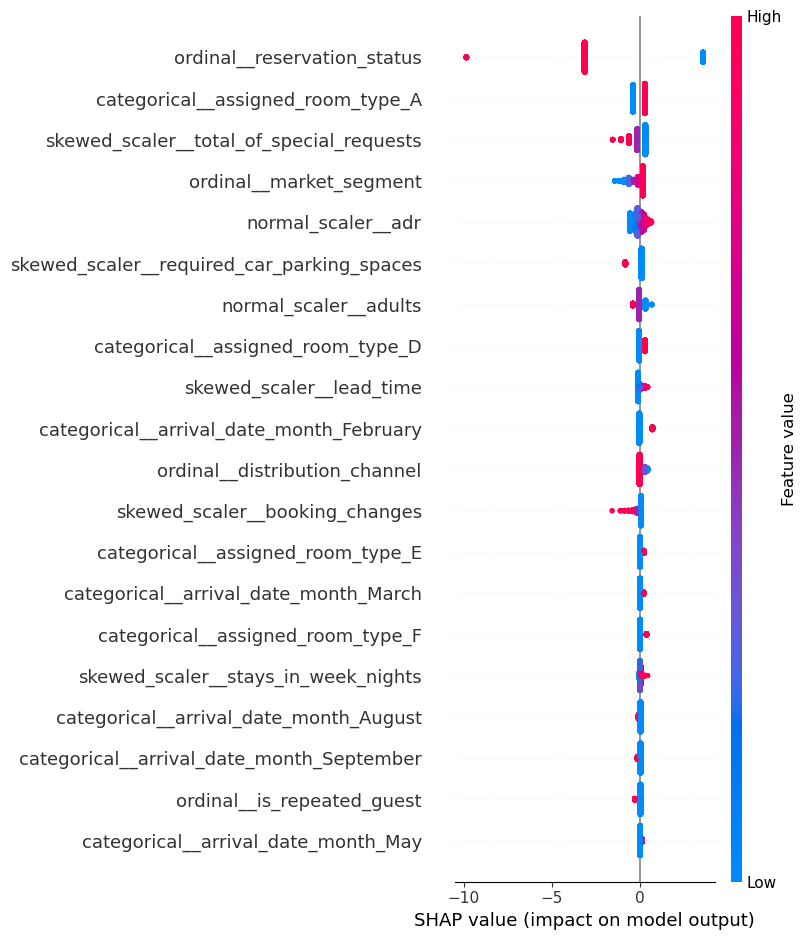

In [122]:
import shap
from sklearn.linear_model import LogisticRegression

# Fit the transformer and KNN model
pipeline_knn_best.fit(X_train_balanced, y_train_balanced)

# Extract the preprocessor and the KNN model from the pipeline
preprocessor = pipeline_knn_best.named_steps['scaling and encoding']
knn_model = pipeline_knn_best.named_steps['model']

# Transform the training data using the preprocessor
X_train_transformed = preprocessor.transform(X_train_balanced)

# Train a surrogate model (Logistic Regression) on the transformed data
surrogate_model = LogisticRegression()
surrogate_model.fit(X_train_transformed, y_train_balanced)

# Use the SHAP explainer on the surrogate model
explainer = shap.Explainer(surrogate_model, X_train_transformed)

# Calculate SHAP values for a sample of the training data
shap_values = explainer.shap_values(X_train_transformed[:2000, :])  # You can adjust the sample size as needed

# Plot the SHAP summary plot with sorting
shap.summary_plot(shap_values, X_train_transformed[:2000, :], feature_names=preprocessor.get_feature_names_out(input_features=X_train_balanced.columns), sort=True)

plt.show()

I will investigate only top 3 features that affect model prediction the most.

It can be seen that reservation status has the highest impact on the model results. I need to investigate more.

In [121]:
data_clean['reservation_status'].value_counts()

Check-Out    63220
Canceled     22992
No-Show       1013
Name: reservation_status, dtype: int64

Apperantly, reservation status has a category called Canceled, which I assume explain the same thing as the is_canceled column. No wonder the model performs really well, because one of it's feature has almost the same meaning as the target, causing it to heavily rely on it.

The next highest impact on the model is assigned room A, which is one of category in the assigned_room column. I have to check further about this.

In [125]:
grouped_df = data_clean.groupby(['assigned_room_type', 'is_canceled']).size().unstack(fill_value=0).reset_index()

# Rename the columns for clarity
grouped_df.columns = ['assigned_room_type', '0_count', '1_count']

# Print the result
print(grouped_df)


   assigned_room_type  0_count  1_count
0                   A    32105    14177
1                   B     1413      394
2                   C     1765      395
3                   D    16988     5431
4                   E     5495     1695
5                   F     2733      894
6                   G     1742      753
7                   H      457      249
8                   I      348        5
9                   K      174       11
10                  L        0        1


A lof of bookings are assigned for room category A, no wonder the impact of this specific category is big to the model. Unfortunately, 2 out of 3 bookings made for room A was canceled. The company should revise their policy regarding room assignment, as there could be a possibility that customers was canceling their reservation because they assigned type A for their stay. But, it could be other resons.

The next highest impact to the model prediction result is the total_of_special_request column. I will have to check further about this column.

In [128]:
# Group by the specified columns
grouped_df = data_clean.groupby(['total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0).reset_index()

# Rename the columns for clarity
grouped_df.columns = ['total_of_special_requests', '0_count', '1_count']

# Calculate percentage columns
grouped_df['0_percentage'] = (grouped_df['0_count'] / grouped_df[['0_count', '1_count']].sum(axis=1)) * 100
grouped_df['1_percentage'] = (grouped_df['1_count'] / grouped_df[['0_count', '1_count']].sum(axis=1)) * 100

# Print the result
print(grouped_df)


   total_of_special_requests  0_count  1_count  0_percentage  1_percentage
0                          0    29228    14561     66.747357     33.252643
1                          1    22475     6498     77.572222     22.427778
2                          2     9279     2514     78.682269     21.317731
3                          3     1918      396     82.886776     17.113224
4                          4      286       34     89.375000     10.625000
5                          5       34        2     94.444444      5.555556


apparently, the higher the number of requests given, the higher the chance of customer canceling their reservations. The company should make an anticipation accordingly, that is if the customer requests too much things, then it's highly likely they will cancel their reservation.

There a lot more insights that can be gained from analyzing that shap value visualization.

# XI. - MODEL SAVING

In [ ]:
with open('deployment\\pipeline_best.pkl', 'wb') as file_1:
    pickle.dump(pipeline_knn_best, file_1)

# XII. - Model Inference

Model Inference will be done in `model_inference.ipynb`

# XIII. - Conclusion

## 1. - Conceptual Problem

### 1.1. - Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Bagging is an ensemble learning technique that can be used to improve the performance of machine learning models. It is used to reduce variance and avoid overfitting of data, and it can be applied to both regression and classification models, particularly those based on decision trees. Bagging works by training multiple models in parallel, and then combining their predictions to produce the final output. One popular algorithm that uses bagging is the Random Forest algorithm, which is a type of decision tree ensemble that was used in this project.

### 1.2. - Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

Random Forest is an ensemble learning method that uses multiple decision trees to make predictions. The decision trees in Random Forest are built independently, without any specific order. The final prediction in Random Forest is determined by the majority vote of the individual tree predictions.

On the other hand, Gradient Boosting Classifier is an ensemble learning method that uses multiple decision trees, but they are built sequentially, one after the other.
Each tree in the sequence tries to correct the errors made by the previous trees. The final prediction is determined by the weighted average of the individual tree predictions, where the weights are assigned based on the performance of each tree.

### 1.3. - Jelaskan apa yang dimaksud dengan Cross Validation !

Cross-validation is a popular method used to evaluate the performance of machine learning models, particularly when the model is overfit. One of the most popular cross-validation, which is the one used in this project is K-Fold Cross-Validation. This evaluation method works by spliting the dataset into a certain number of folds (k). The model is trained on k-1 of the folds, and the remaining fold is used for testing. This process is repeated k times, with each fold being used as the test set once.

## 2. - Final Conclusion

Hotel booking cancellations are a major problem for the hotel industry, as they might cause significant revenue losses to the owner. Moreover, cancellations are often unpredictable and depend a lot factors, such as the deposit type, the customer profile, and the seasonality. Therefore, it is important for hotel managers to have a way of forecasting the demand and the cancellation probability for each booking, so that they can optimize their pricing, inventory, and operational strategies. XYZ a tourism company that have been experiencing a lot of cancellation in some of their hotel. They need a classification machine learning model that can help them forecast whether or not a customer is going to cancel their booking. In this project I'm trying to build a clasification model using Hotel Booking Demand Dataset.

Before creating the model, I need to perform an exploratory analysis on the dataset. Here are insights and recommendations I composed based on the analisis that I've done:

1. both hotels are very popular in europian countries, especially Portugal, so XYZ should target more guests from these countries. They also should try to explore market potential in countries nearby those countries, as the citizens may have similar preferences or needs. They should also increase their customer loyalty by customizing their services based on those countries cultures, for example serving sourthern europian dishes, or offering promos on those countries national holidays.

2. Both hotel has similar seasonal pattern where the peak arrival of customers are in August, while the lowest arrival of custumers are in January. To adress this, the company should prepare for their services in summer season, especially in August. This recommendation also supported by the fact that summer is holiday season in most europian countries, especially Portugal. To prepare apropriately, the company should also acknowledge the fact that their hotels are not popular in winter, the lowest in January, and will gradually rises again at the end of winter (February).

3. In both hotel, the cancellation is highest in Summer, this makes sense as the reservations are also peaked at Summer. To address this, the company may have to implement some policies to discourage cancellations, especially in the Summer seasons, when the demand is high. For example, the company can charge a cancellation fee.

4. There is a significance difference between the average daily rate generated by city hotel compared to resort hotel. City hotel was having higher `idr` generated. XYZ should focus on their city hotel, since it generates more money for them.

The models created in this project shows a perfect or almost perfect precision test. This means the model can almost always guessed correctly the canceled reservations. But, based on my personal judgement this might also happened because of test data leaked in the training set. Because the results of 100% is almost too good to be true. Nevertheless, the model have showed great performance.

After some analysis on each features impact on the model prediction, I found out that a column called `reservation_status` exists. This column apperantly also explains booking cancelation as one of it's category. This is why model performs very well. To improve the model in the future, I will have to eliminate this column during feature extraction, as it gives too much, but not generalized information to the model.

Other insights and recommendations that I composed after doing model analysis are:

1. A lof of bookings are assigned for room category A. Unfortunately, 2 out of 3 bookings made for room A was canceled. The company should revise their policy regarding room assignment, as there could be a possibility that one of the reasons customers was canceling their reservation was because they assigned type A for their stay.

2. The higher the number of requests given, the higher the chance of customer canceling their reservations. The company should make an anticipation accordingly, which is if the customer requests too much things, then it's highly likely they will cancel their reservation.